In [1]:
import numpy as np
import pickle

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
with open('./varying_subintervals/data/common_data.pkl','rb') as f:
    xout, tout, x_without_noise, euler_param, sim_param = pickle.load(f)
    
with open('./varying_subintervals/results/subint_1.pkl','rb') as f:
    error_list, theta_list, transformed_theta, em_param, data_param = pickle.load(f)

In [3]:
print(error_list)
print(theta_list)
print(transformed_theta)
print(transformed_theta.shape)

[4.914183886357395, 0.0]
[array([[ 0.13801923],
       [ 1.41287394],
       [-2.08411248],
       [ 0.1347189 ]]), array([[ 0.13801923],
       [ 1.41287394],
       [-2.08411248],
       [ 0.1347189 ]])]
[[ 1.01798586  0.78818296 -0.93081032  0.        ]]
(1, 4)


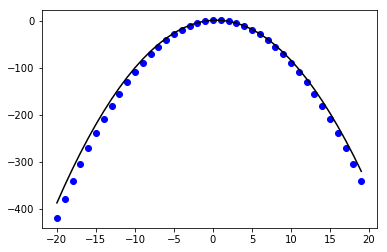

In [4]:
# true curve vs inferred curve
def true_function(x):
    return 1 + x - x**2

def estimated_function(theta, x):
    return (theta[0, 0] + theta[0, 1]*x + theta[0, 2]*(x**2) + theta[0, 3]*(x**3))

x1 = np.arange(-20.0, 20.0, 1)
x2 = np.arange(-20.0, 20.0, 1)

plt.plot(x1, true_function(x1), 'bo', x2, estimated_function(transformed_theta, x2), 'k')
plt.show()

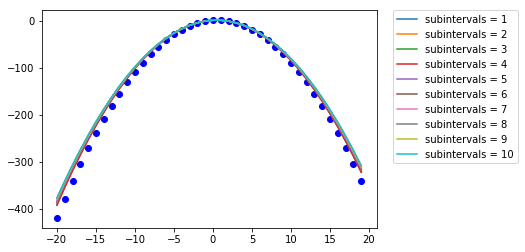

In [5]:
# true curve vs inferred curve for varying number of subintervals
transformed_theta_list = []
for i in range(1, 11):
    with open('./varying_subintervals/results/subint_' + str(i) + '.pkl','rb') as f:
        _, _, transformed_theta, em_param, _ = pickle.load(f)
    transformed_theta_list.append((transformed_theta, em_param))
    
def true_function(x):
    return 1 + x - x**2

def estimated_function(theta, x):
    return (theta[0, 0] + theta[0, 1]*x + theta[0, 2]*(x**2) + theta[0, 3]*(x**3))

x1 = np.arange(-20.0, 20.0, 1)
x2 = np.arange(-20.0, 20.0, 1)

plt.plot(x1, true_function(x1), 'bo')

for theta in transformed_theta_list:
    plt.plot(x2, estimated_function(theta[0], x2), label = 'subintervals = ' + str(theta[1].numsubintervals))

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

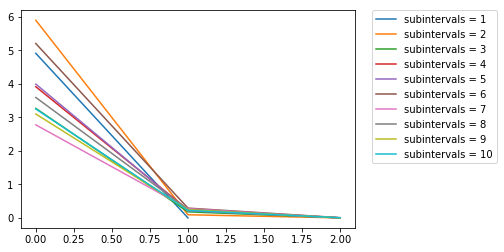

In [6]:
# error trajectories for verying number of subintervals
meta_error_list = []
for i in range(1, 11):
    with open('./varying_subintervals/results/subint_' + str(i) + '.pkl','rb') as f:
        error_list, _, _, em_param, _ = pickle.load(f)
    meta_error_list.append((error_list, em_param))

for error_list in meta_error_list:
    plt.plot(error_list[0], label = 'subintervals = ' + str(error_list[1].numsubintervals))

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

In [9]:
for error_list in meta_error_list:
    print(error_list[0])

[4.914183886357395, 0.0]
[5.9023135408631529, 0.09394351772024867, 0.0015849434603107701]
[3.2704451663156942, 0.18124935258261921, 0.0022848076847678226]
[3.9172259286430426, 0.24572146539353257, 0.0011696036343859819]
[3.9954986216025183, 0.21454443966495762, 0.00083264207268578705]
[5.2068633201104735, 0.29286565633060918, 0.0066608469748659551]
[2.7789245325931549, 0.27675528853829767, 0.0012377205350587801]
[3.5964591905815468, 0.2538315202280777, 0.0041918529510171776]
[3.1035928511434347, 0.24511455176062383, 0.00038288490837177846]
[3.253505430110466, 0.22433741367805779, 0.0044485054217671535]
